In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [100]:
df.shape

(301, 9)

In [101]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [102]:
df["Selling_type"].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [103]:
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [104]:
unique_car_names_count = df["Car_Name"].nunique()
print(unique_car_names_count)

98


In [105]:
unique_car_names = df["Car_Name"].unique()
unique_car_names.sort()
unique_car_names_list = unique_car_names.tolist()
print(unique_car_names_list)

['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100', 'Bajaj Avenger 150', 'Bajaj Avenger 150 street', 'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger Street 220', 'Bajaj Discover 100', 'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme', 'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour', 'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk', 'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus', 'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125', 'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine', 'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister', 'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma', 'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390', 'Mahindra Mojo XT300', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 350', 'Royal Enfield Classic 500', 'Royal Enf

In [117]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Car_Name" column
df["Car_Name_encoded"] = label_encoder.fit_transform(df["Car_Name"])
# Display the mapping of original names to encoded values for Car_Name
mapping_car_name = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of Car_Name to encoded values:")
print(mapping_car_name)

# Encode the "Fuel_Type" column
df["Fuel_Type_encoded"] = label_encoder.fit_transform(df["Fuel_Type"])
# Display the mapping of original names to encoded values for Fuel_Type
mapping_fuel_type = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapping of Fuel_Type to encoded values:")
print(mapping_fuel_type)

# Encode the "Selling_type" column
df["Selling_type_encoded"] = label_encoder.fit_transform(df["Selling_type"])
# Display the mapping of original names to encoded values for Selling_type
mapping_selling_type = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapping of Selling_type to encoded values:")
print(mapping_selling_type)


Mapping of Car_Name to encoded values:
{'800': 0, 'Activa 3g': 1, 'Activa 4g': 2, 'Bajaj  ct 100': 3, 'Bajaj Avenger 150': 4, 'Bajaj Avenger 150 street': 5, 'Bajaj Avenger 220': 6, 'Bajaj Avenger 220 dtsi': 7, 'Bajaj Avenger Street 220': 8, 'Bajaj Discover 100': 9, 'Bajaj Discover 125': 10, 'Bajaj Dominar 400': 11, 'Bajaj Pulsar  NS 200': 12, 'Bajaj Pulsar 135 LS': 13, 'Bajaj Pulsar 150': 14, 'Bajaj Pulsar 220 F': 15, 'Bajaj Pulsar NS 200': 16, 'Bajaj Pulsar RS200': 17, 'Hero  CBZ Xtreme': 18, 'Hero  Ignitor Disc': 19, 'Hero Extreme': 20, 'Hero Glamour': 21, 'Hero Honda CBZ extreme': 22, 'Hero Honda Passion Pro': 23, 'Hero Hunk': 24, 'Hero Passion Pro': 25, 'Hero Passion X pro': 26, 'Hero Splender Plus': 27, 'Hero Splender iSmart': 28, 'Hero Super Splendor': 29, 'Honda Activa 125': 30, 'Honda Activa 4G': 31, 'Honda CB Hornet 160R': 32, 'Honda CB Shine': 33, 'Honda CB Trigger': 34, 'Honda CB Unicorn': 35, 'Honda CB twister': 36, 'Honda CBR 150': 37, 'Honda Dream Yuga ': 38, 'Honda Kariz

# drop all cols which we will not use in our prediction 

In [140]:

# Assuming your DataFrame is named df
corr_matrix = df.corr()

# Create a heatmap using Plotly express
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(title='Correlation Heatmap',
                  width=800,
                  height=600,
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))

# Show the plot
fig.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17024\3097070604.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [143]:
df = df.drop(columns=["Car_Name"])
df = df.drop(columns=["Fuel_Type","Selling_type","Transmission","Owner"])
df = df.drop(columns=["Year"])
df = df.drop(columns=["Present_Price"])
df.head()

,Selling_Price,Driven_kms,Car_Name_encoded,Selling_type_encoded,Fuel_Type_encoded
0,0.16,7.09091,90,0,2
1,0.16,7.09091,93,0,1
2,0.16,7.09091,68,0,2
3,0.16,7.09091,96,0,2
4,0.16,7.09091,92,0,1


In [144]:
df.describe()

,Selling_Price,Driven_kms,Car_Name_encoded,Selling_type_encoded,Fuel_Type_encoded
count,3.010000e+02,3.010000e+02,301.000000,301.000000,301.000000
mean,1.600000e-01,7.090910e+00,62.571429,0.352159,1.787375
std,1.084270e-15,8.006917e-15,25.573535,0.478439,0.425801
min,1.600000e-01,7.090910e+00,0.000000,0.000000,0.000000
25%,1.600000e-01,7.090910e+00,47.000000,0.000000,2.000000
50%,1.600000e-01,7.090910e+00,69.000000,0.000000,2.000000
75%,1.600000e-01,7.090910e+00,82.000000,1.000000,2.000000
max,1.600000e-01,7.090910e+00,97.000000,1.000000,2.000000


In [145]:
df[["Driven_kms","Selling_Price"]].describe().round(2)

,Driven_kms,Selling_Price
count,301.00,301.00
mean,7.09,0.16
std,0.00,0.00
min,7.09,0.16
25%,7.09,0.16
50%,7.09,0.16
75%,7.09,0.16
max,7.09,0.16


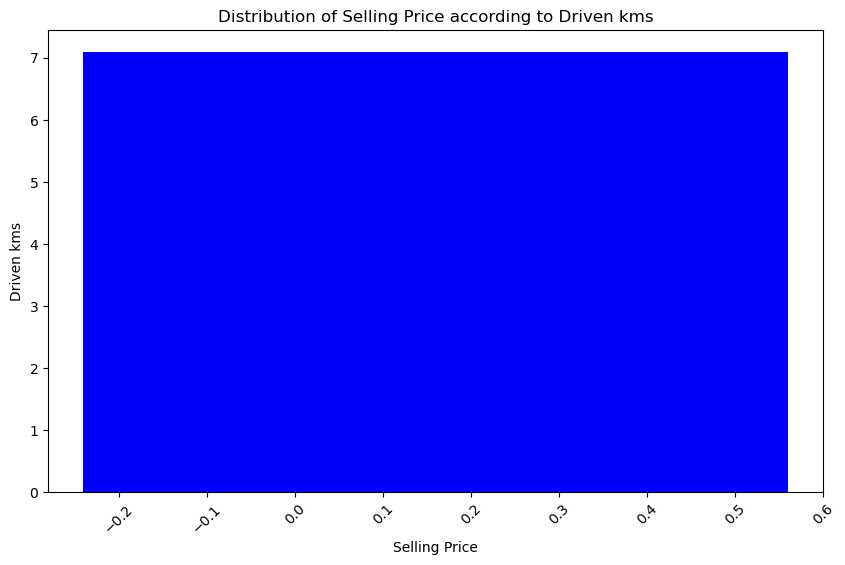

In [146]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Use a different color for the bars
plt.bar(df["Selling_Price"], df["Driven_kms"], color="blue")

# Set labels and title
plt.xlabel("Selling Price")
plt.ylabel("Driven kms")
plt.title("Distribution of Selling Price according to Driven kms")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


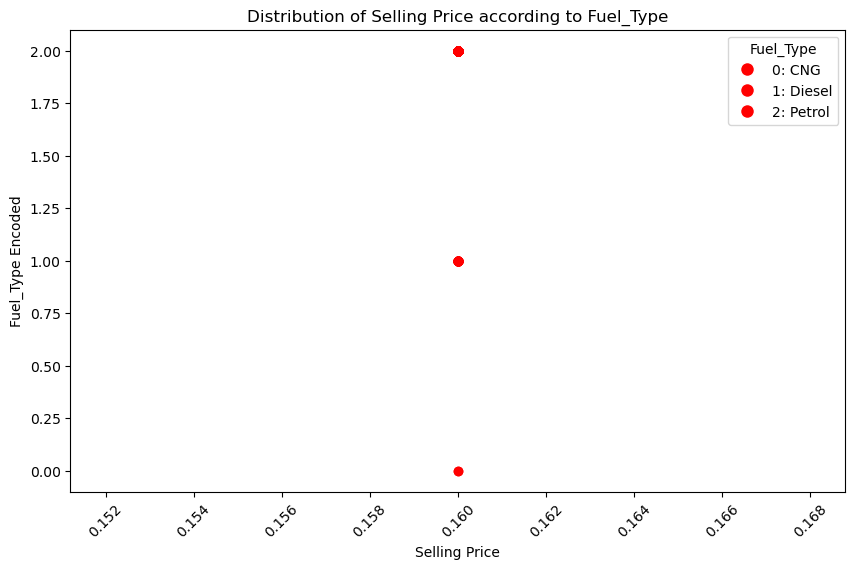

In [148]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Use a different color for the points
scatter = plt.scatter(df["Selling_Price"], df["Fuel_Type_encoded"], color="red")

# Set labels and title
plt.xlabel("Selling Price")
plt.ylabel("Fuel_Type Encoded")
plt.title("Distribution of Selling Price according to Fuel_Type")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Create a legend with mapping information
legend_labels = {value: key for key, value in mapping_fuel_type.items()}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f"{key}: {legend_labels[key]}")
                   for key in legend_labels]

plt.legend(handles=legend_elements, title="Fuel_Type")

# Show the plot
plt.show()


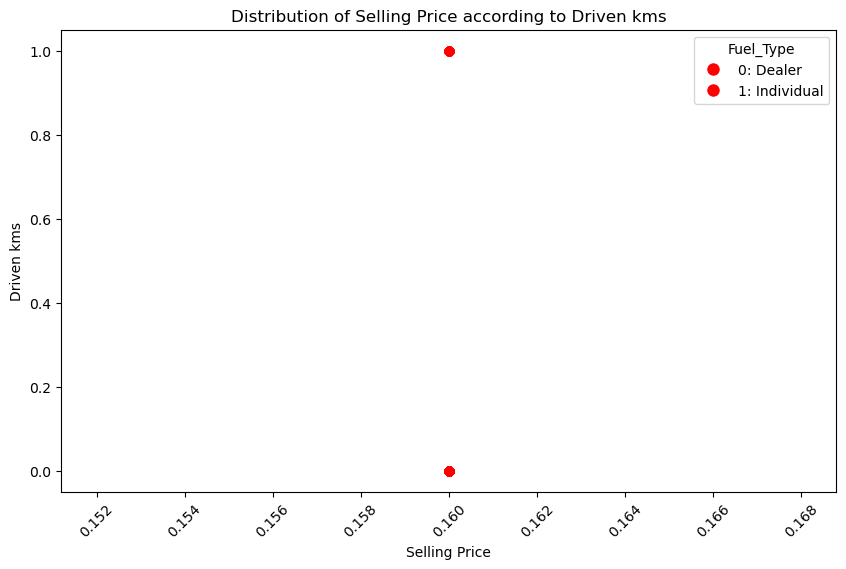

In [160]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Use a different color for the bars
plt.scatter(df["Selling_Price"], df["Selling_type_encoded"], color="red")

# Set labels and title
plt.xlabel("Selling Price")
plt.ylabel("Driven kms")
plt.title("Distribution of Selling Price according to Driven kms")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Create a legend with mapping information
legend_labels = {value: key for key, value in mapping_selling_type.items()}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f"{key}: {legend_labels[key]}")
                   for key in legend_labels]

plt.legend(handles=legend_elements, title="Fuel_Type")

# Show the plot
plt.show()


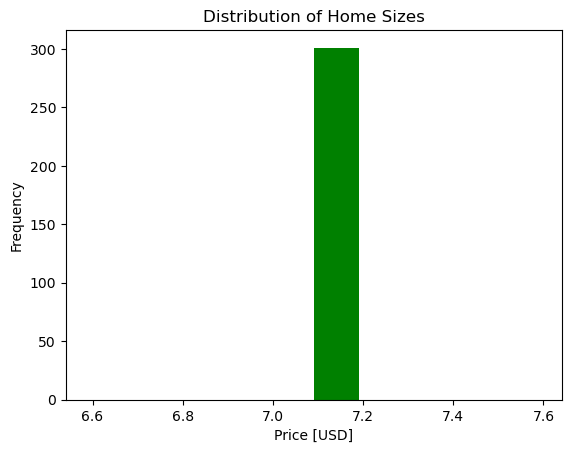

In [150]:
plt.hist(df["Driven_kms"],color="green");
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

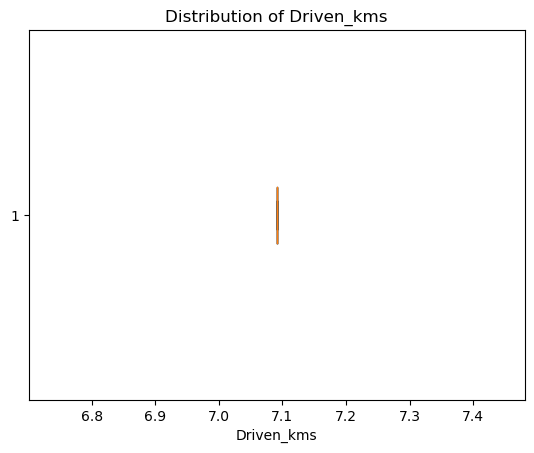

In [151]:
plt.boxplot(df["Driven_kms"],vert=False);
plt.xlabel("Driven_kms")
plt.title("Distribution of Driven_kms");

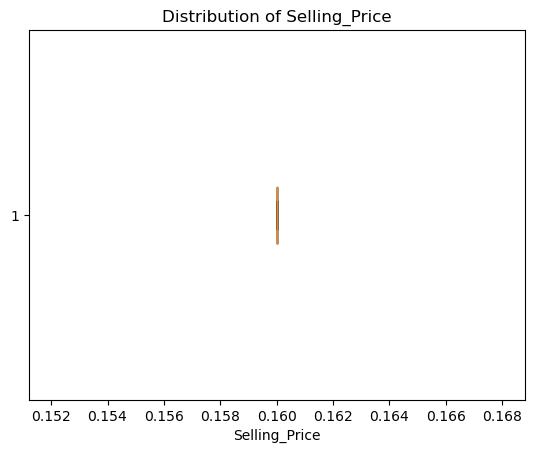

In [152]:
plt.boxplot(df["Selling_Price"],vert=False);
plt.xlabel("Selling_Price")
plt.title("Distribution of Selling_Price");

# Build the model

In [163]:
# Assuming df is your DataFrame with the relevant columns including 'Selling_Price'

# Features (X) and target variable (y)
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [166]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0
R-squared: 1.0
